### Plan (draft 1):
- Choose model
- Explain model
- Train model on data set
- Analyize accuracy.
- Write Python script to run web service
- Docker file
- README.md

In [50]:
import pandas as pd
import numpy as np
from sklearn.neighbors import RadiusNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df = pd.read_csv("powerproduction.csv")
df

,speed,power
0,0.000,0.0
1,0.125,0.0
2,0.150,0.0
3,0.225,0.0
4,0.275,0.0
...,...,...
495,24.775,0.0
496,24.850,0.0
497,24.875,0.0
498,24.950,0.0


In [3]:
df = df[df.power != 0]
df

#[] grepper.com, "delete row with zero value in a column pyton; Code Answer
#", https://www.codegrepper.com/code-examples/delphi/delete+row+with+zero+value+in+a+column+pyton

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
485,24.249,103.700
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


In [4]:
import matplotlib.pyplot as plt

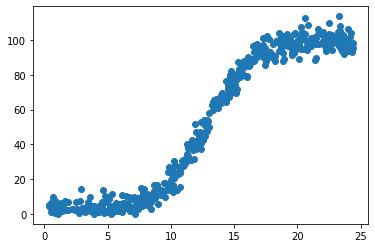

In [5]:
plt.scatter(df["speed"], df["power"])
plt.show()

In [6]:
def simpleLinearRegression(independentVars, dependentVars):
    # distance in meters
    y = dependentVars
    # time in seconds
    x  = independentVars

    yhat = []
    errors = []

    b1 = (sum(y)*sum(x) - len(x)*(sum(y)/len(y))*(sum(x)/len(x)))/((sum(x))**2- (len(x)*(sum(x)/len(x))*(sum(x)/len(x))))

    b0 = (sum(y)/len(y)) - b1*(sum(x)/len(x))
    
    for i in range(0, len(x)):
        yhat.append(b1*x[i] + b0)
        errors.append((y[i] - yhat[i])**2)
        
    accuarcy = sum(errors)
    print(accuarcy)
        
    plt.scatter(x, y, c="r")    
    plt.plot(x, yhat, c="m")

In [7]:
import matplotlib.pyplot as plt
import csv
import numpy as np


with open('powerproduction.csv', 'r', newline='') as file:
    has_header = csv.Sniffer().has_header(file.read(1024))
    file.seek(0)  # Rewind.
    reader = csv.reader(file)
    if has_header:
        next(reader)
    your_list = list(reader)

independentVars = []
dependentVars = []

for i in range(len(your_list)):
    independentVars.append(float(your_list[i][0]))
    dependentVars.append(float(your_list[i][1]))

for i in range((len(dependentVars)), 0):
    if (dependentVars[i] == 0.000):
        del dependentVars[i]
        del independentVars[i]

In [8]:
a, b, c = np.polyfit(independentVars, dependentVars, 2)
independentVars = np.array(independentVars)
dependentVars = np.array(dependentVars)

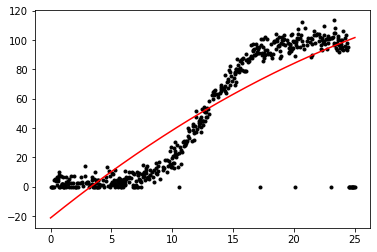

In [9]:
# Plot the line and the points.
plt.plot(independentVars, dependentVars, 'k.')
plt.plot(independentVars, a * independentVars * independentVars + b * independentVars + c, 'r-')

265989.41437957867


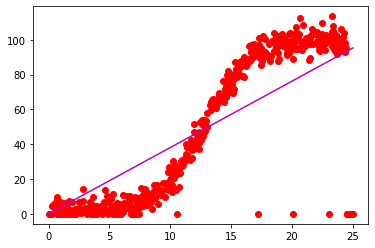

In [10]:
    
simpleLinearRegression(independentVars, dependentVars)

In [11]:
for i in range((len(dependentVars))):
    if (dependentVars[i] == 0.000):
        del dependentVars[i]
        del independentVars[i]
        
simpleLinearRegression(independentVars, dependentVars)

ValueError: cannot delete array elements

So here's what has to happen (I think) to make this model fit you need to add extra powers of x with a coeffient. Basically going from a simple line to a quadratic and up and up until you find a good fit.....

In [ ]:
minN = 4.331
maxN = 109.932

Ps = []



N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*p)) + 1/maxN)

In [ ]:
def logisticFunction(independentVars, dependentVars, r):
    # distance in meters
    p = dependentVars
    # time in seconds
    s  = independentVars
    
    e = 2.71828
    
    minN = 4.331
    maxN = 109.932

    P_s = []
    
    for i in range(0, len(s)):
        
        N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*p[i])) + 1/maxN)
        P_s.append(N_at_speed_s)
        
    
        
    plt.scatter(s, p, c="r")    
    plt.plot(s, P_s, c="b")
    
logisticFunction(independentVars, dependentVars, 0.052)

https://www.khanacademy.org/math/ap-calculus-bc/bc-differential-equations-new/bc-7-9/v/solving-logistic-differential-equation-part2

In [ ]:
logisticFunction(independentVars, dependentVars, 0.052)

This is so cool

In [ ]:
def Regression(x, y):
    # distance in meters
    #y = dependentVars
    # time in seconds
    #x  = independentVars

    yhat = []
    errors = []
    
    sumxi = sum(x)
    sumyi = sum(y)
    meanx = (sum(x)/len(x))
    meany = (sum(y)/len(y))
    
    b3 = ((meany*((sumxi)**3)) - (sumyi*(sumxi**3)))/((meanx*(sumxi**4)) - sumxi**5)
    
    b2 = ((sumyi*(sumxi**2)) - meany*(sumxi**2) + b3*(meanx*(sumxi**4)) - sumxi**5)/((meanx*(sumxi**3)) - sumxi**4)
    
    b1 = ((sumxi*sumyi) - (meany * sumxi) + b2 * ((meanx*(sumxi**2)) - sumxi**3) - b3*((meanx*(sumxi**3)) - sumxi**4))/((meanx*sumxi) - sumxi**2)
    
    b0 = meany - b1*meanx - b2*meanx*(sumxi) - b3*meanx*(sumxi**4)
    
    for i in range(0, len(x)):
        yhat.append(b0 + b1*x[i] + b2*((x[i])**2) + b3*((x[i])**3))
        errors.append((y[i] - yhat[i])**2)
        
    accuarcy = sum(errors)
    print(accuarcy)
        
    plt.scatter(x, y, c="r")    
    plt.plot(x, yhat, c="m")


In [ ]:
Regression(independentVars, dependentVars)

# Regression using scikit-learn notes




In [ ]:
len(independentVars)

In [ ]:
dependentVars[453]

In [ ]:
import matplotlib.pyplot as plt
import csv
import numpy as np


with open('powerproduction.csv', 'r', newline='') as file:
    has_header = csv.Sniffer().has_header(file.read(1024))
    file.seek(0)  # Rewind.
    reader = csv.reader(file)
    if has_header:
        next(reader)
    your_list = list(reader)

In [ ]:
len(your_list)

In [26]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd

df = pd.read_csv("powerproduction.csv")

    
#df = pd.DataFrame(your_list, columns=["speed", "power"])
df = df[df.power != 0]
df = df.sort_values('speed')

X = df['speed'].to_numpy()
y = df['power'].to_numpy()

In [27]:
from sklearn.neighbors import RadiusNeighborsRegressor

In [34]:
neigh = RadiusNeighborsRegressor(radius=1.0)
neigh.fit(X.reshape(-1, 1), y)

RadiusNeighborsRegressor()

In [35]:
mean_squared_error(y, neigh.predict(X.reshape(-1, 1)))

16.27213107328979

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [48]:
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X.reshape(-1, 1), y)

KNeighborsRegressor(n_neighbors=2)

In [49]:
mean_squared_error(y, neigh.predict(X.reshape(-1, 1)))

8.118431566518849

In [ ]:
def logisticFunction(independentVars, dependentVars, r):
    # distance in meters
    p = dependentVars
    # time in seconds
    s  = independentVars
    
    e = 2.71828
    
    minN = 4.331
    maxN = 109.932

    P_s = []
    
    for i in range(0, len(s)):
        
        #N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*p[i])) + 1/maxN)
        N_at_speed_s = 1/(((1/minN - 1/maxN)*e**(-r*p[i])) + 1/maxN)
        P_s.append(N_at_speed_s)
        
    
        
    plt.scatter(s, p, c="r")    
    plt.plot(s, P_s, c="b")
    
logisticFunction(independentVars, dependentVars, 0.063)

In [ ]:
for i in range(len(independentVars)-1):
    if independentVars[i] - independentVars[i+1] > 0:
        print(True)

In [ ]:
independentVars = df['speed'].to_numpy()
dependentVars = df['power'].to_numpy()
        
a, b, c = np.polyfit(independentVars, dependentVars, 2)
independentVars = np.array(independentVars)
dependentVars = np.array(dependentVars)
# Plot the line and the points.
plt.plot(independentVars, dependentVars, 'k.')
plt.plot(independentVars, a * independentVars * independentVars + b * independentVars + c, 'r-')

In [ ]:
Regression(independentVars, dependentVars)

In [12]:
import matplotlib.pyplot as plt
import csv
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

df = pd.read_csv("powerproduction.csv")

    
#df = pd.DataFrame(your_list, columns=["speed", "power"])
df = df[df.power != 0]
df

X = df['speed'].to_numpy()
y = df['power'].to_numpy()

In [13]:
logisticFunction(X, y, 0.052)

NameError: name 'logisticFunction' is not defined

In [19]:
np.shape(X.reshape(1, -1))[0], np.shape(y)[0]

(1, 451)

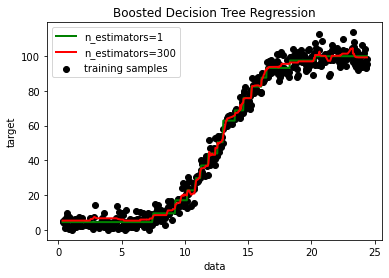

In [22]:
# https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_regression.html#sphx-glr-auto-examples-ensemble-plot-adaboost-regression-py
# Fit regression model
regr_1 = DecisionTreeRegressor(max_depth=4)

rng = np.random.RandomState(1)

regr_2 = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),
                          n_estimators=300, random_state=2)
X = X.reshape(-1, 1)
regr_1.fit(X, y)
regr_2.fit(X, y)

# Predict
y_1 = regr_1.predict(X)
y_2 = regr_2.predict(X)

# Plot the results
plt.figure()
plt.scatter(X, y, c="k", label="training samples")
plt.plot(X, y_1, c="g", label="n_estimators=1", linewidth=2)
plt.plot(X, y_2, c="r", label="n_estimators=300", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Boosted Decision Tree Regression")
plt.legend()
plt.show()

In [23]:
def mean_squared_error(actual, predicted):
    """
    Takes two numpy arrays the actual values and the predicted values to 
    determine the accuracy of the prediction.
    """
    ms = 0
    for point in range(len(actual)):
        error = (actual[point] - predicted[point])**2
        ms += error
        mse = ms/len(actual)
    return mse

In [33]:
mean_squared_error(y, neigh.predict(X.reshape(-1, 1)))

16.27213107328979

In [ ]:
data = {'power': [0, 1, 2.1, 10, 0, 0, 3, 4, 5, 0, 0], 
        'speed': [0, 6.5, 2.7, 23, 20, 50, 60, 70, 80, 90, 100]}
df = pd.DataFrame(data)
df.sort_values('speed')

In [ ]:
df[:1]

nf = df[1:]

nz = nf[nf.power != 0]

In [ ]:
#df = df[]
#nz = df[1:].power != 0
df = pd.concat([df[:1] , nz])
df